<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [38]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [39]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [40]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [41]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [42]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [43]:
#Task 1: Become familiar with the dataset
#The following describes the dataset variables:

#      CRIM - per capita crime rate by town

#      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#      INDUS - proportion of non-retail business acres per town.

#      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#      NOX - nitric oxides concentration (parts per 10 million)

#      RM - average number of rooms per dwelling

#      AGE - proportion of owner-occupied units built prior to 1940

#      DIS - weighted distances to five Boston employment centres

#      RAD - index of accessibility to radial highways

#      TAX - full-value property-tax rate per $10,000

#      PTRATIO - pupil-teacher ratio by town

#      LSTAT - % lower status of the population

#      MEDV - Median value of owner-occupied homes in $1000's

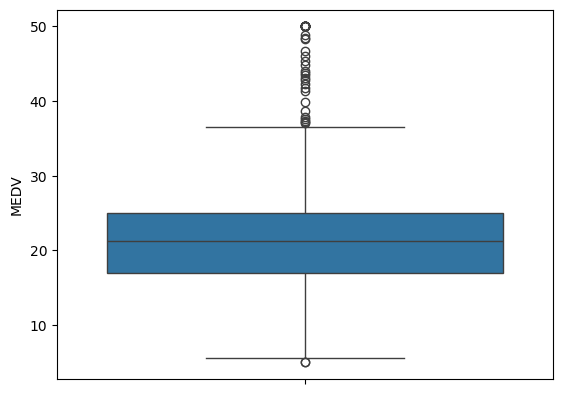

In [44]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y='MEDV', data=boston_df)
pyplot.show()

Text(0.5, 0.98, 'Homes near the Charles River')

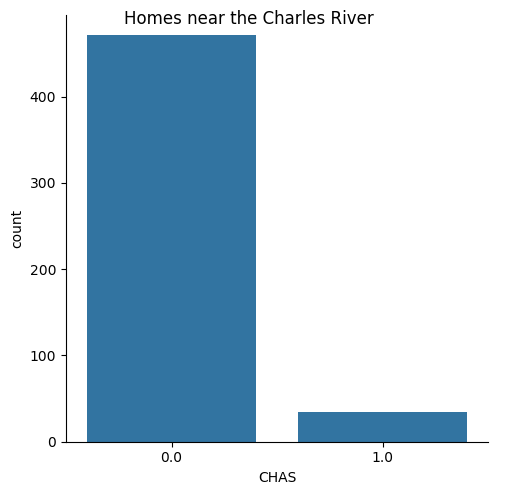

In [45]:
#Provide a  bar plot for the Charles river variable
cr = sns.catplot(x='CHAS', kind='count',  data=boston_df)
cr.fig.suptitle("Homes near the Charles River")

In [46]:
# the Bar plot above shows that majority of homes are NOT near the Charles River

Text(0.5, 1.0, 'Median of Owner-Occupied Homes by Age')

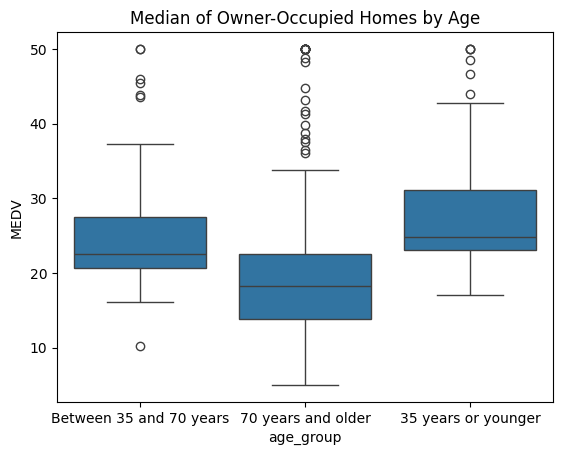

In [47]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 years or younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE']< 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group' , y='MEDV', data=boston_df)
ax.set_title('Median of Owner-Occupied Homes by Age')

In [30]:
# based on the boxplot above, it is evident that the median value of Owner-Occupied homes decreases as the age increases.

Text(0.5, 1.0, 'Relationship of Nitric oxide concentration with non-retail business acres per town')

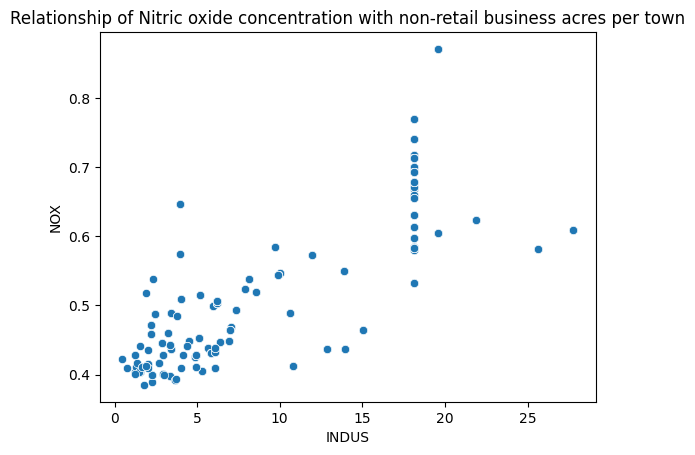

In [48]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?

ax1 = sns.scatterplot(x='INDUS',  y='NOX', data = boston_df)
ax1.set_title('Relationship of Nitric oxide concentration with non-retail business acres per town')

In [32]:
# Based on the scatterplot above, there seems to be a positive corelation between the Nitric Oxide Concentration and Non Retail business acres per town.
# As the number of acres of non retail businesses increase, so does the Nitric Oxide Concentration

Text(0.5, 1.0, 'Pupil to Teacher ratio')

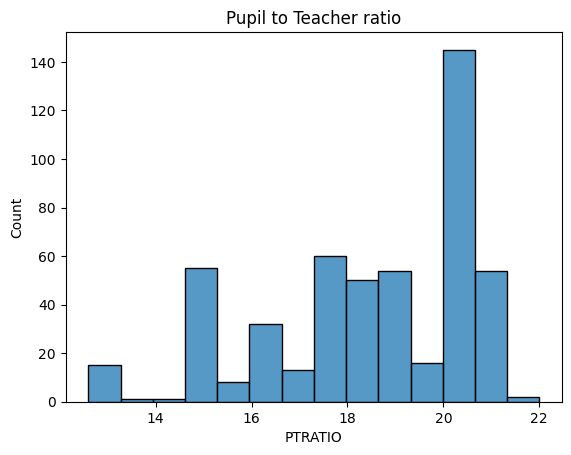

In [49]:
#Create a histogram for the pupil to teacher ratio variable

ax2 = sns.histplot(x ='PTRATIO', data = boston_df)
ax2.set_title('Pupil to Teacher ratio')

In [50]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Null Hypothesis : There is no significant difference between the Median values of homes bounded and not bounded by the Charles River
# Alternate Hypothesis: There is a significant difference between the homes bounded and  not bounded by the Charles River

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [44]:
# Since the p-value is less than a = 0.05 we REJECT the null hypothesis that there 
# is no significant difference between the homes bounded and not bounded by the Charles River.
#There is a significant difference.  

In [68]:
#Is there a difference in Median values of houses (MEDV) 
# for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Null Hypothesis = There is NO difference in the Median values of houses for  each proportion of owner occupied units built prior to 1940
# Alternative  Hypothesis = There is a  difference between Median values  for each proportion of owner occupied units built prior to 1940

lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)


# YOU CAN ALSO DO IT THIS WAY

# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years or younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   )
# create new  variables
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years or younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

#Run one way anova

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))



              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN
F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [13]:
# Based on the results above, since the p-value is less than a= 0.05, we  REJECT the null hypothesis and conclude that
#there  is a difference in Median Values for each proportion of owner occupied units  built prior  to 1940

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

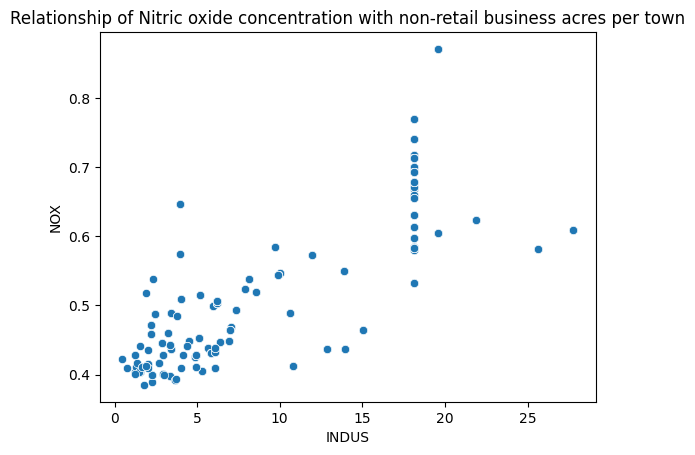

In [22]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and 
# proportion of non-retail business acres per town? (Pearson Correlation)

#NULL Hypothesis: There is no relationship  between Nitric Oxide concentations and proportion of non retail business acres per town
#Alternative  Hypothesis: There is a relationship  that exists between Nitric Oxide concentations and proportion of non retail business acres per town

ax1 = sns.scatterplot(x='INDUS',  y='NOX', data = boston_df)
ax1.set_title('Relationship of Nitric oxide concentration with non-retail business acres per town')

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


In [65]:
# based on the scatterplot and p-value being less than 0.05, we REJECT  the null hypothesisas 
#as it is evident that there is a positive  corelation that exists between Nitric Oxide concentations and proportion of non retail business acres per town

In [69]:
#What is the impact of an additional weighted distance  to the five Boston employment centres 
#on the median value of owner occupied homes? (Regression analysis)

X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        19:45:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# based on the results above, the DIS has a coefficient of 1.0916, that means that 
#the additional weighted distance to the  Boston employment centres increases the median value MEDV value  by 1.0916